In [5]:
#Task0 warmup 

import pandas as pd
data = pd.read_csv("iris_clusters.csv", delimiter=";")
print(data)

      pl   pw   sl   sw       id
0    6.7  3.0  4.6  1.5     87.0
1    6.7  2.8  4.6  1.2    209.0
2    5.0  3.6  1.6  0.5    344.0
3    6.3  3.1  5.9  2.5    401.0
4    7.0  2.9  5.7  1.7    430.0
..   ...  ...  ...  ...      ...
295  6.8  3.0  5.0  2.5  14842.0
296  5.7  2.6  4.9  1.9  14843.0
297  5.6  3.4  1.2  0.2  14887.0
298  5.4  2.6  4.3  1.2  14941.0
299  5.7  2.7  4.2  1.3  14950.0

[300 rows x 5 columns]


Centroids:
 [[0.04047078 0.30016722 0.22014399 0.5026087 ]
 [0.0187146  0.58230769 0.03558442 0.0792    ]
 [0.04949985 0.39081886 0.28773914 0.78322581]]
    pl   pw   sl   sw     id  Cluster
0  6.7  3.0  4.6  1.5   87.0        0
1  6.7  2.8  4.6  1.2  209.0        0
2  5.0  3.6  1.6  0.5  344.0        1
3  6.3  3.1  5.9  2.5  401.0        2
4  7.0  2.9  5.7  1.7  430.0        2


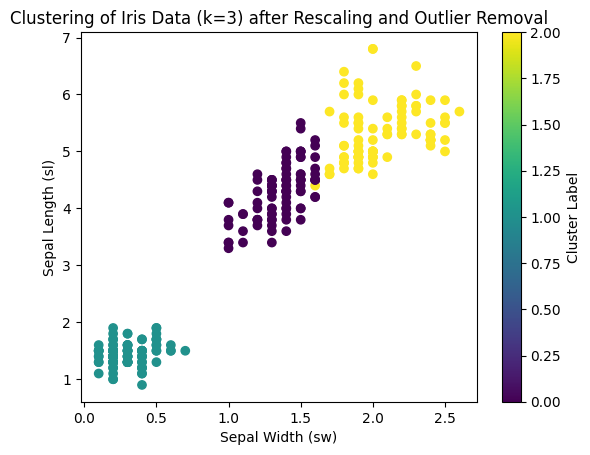

Min values:
 pl    4.1
pw    1.9
sl    0.9
sw    0.1
dtype: float64
Max values:
 pl    7.7
pw    4.2
sl    6.8
sw    2.6
dtype: float64
Mean values:
 pl    5.742456
pw    3.014737
sl    3.632632
sw    1.214035
dtype: float64
Records in each cluster:
 Cluster
1    100
2     93
0     92
Name: count, dtype: int64


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'data' is already a pandas DataFrame with your features
# Exclude the 'id' column when preparing features for scaling and clustering
features = data[['pl', 'pw', 'sl', 'sw']]

# Step 1: Apply Min-Max Rescaling to scale all features to the interval [0, 1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Detect Outliers using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)  # 5% contamination (5 out of 100)
outlier_flags = lof.fit_predict(scaled_features)

# LOF returns -1 for outliers and 1 for inliers, so we'll filter out the outliers
non_outlier_indices = outlier_flags != -1  # Keep non-outliers
filtered_features = scaled_features[non_outlier_indices]
filtered_data = data[non_outlier_indices].reset_index(drop=True)

# Step 3: Apply the k-Means clustering with 3 clusters to the filtered and rescaled data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(filtered_features)

# Step 4: Create a new column to store the cluster labels in the filtered data
filtered_data['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)
print(filtered_data.head())  # Check the first few rows of the filtered data with clusters

# Step 5: Visualization of the clusters using Sepal Width and Sepal Length
plt.scatter(filtered_data['sw'], filtered_data['sl'], c=filtered_data['Cluster'], cmap='viridis')
plt.title('Clustering of Iris Data (k=3) after Rescaling and Outlier Removal')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 6: Statistics of the data (min, max, mean) after rescaling and outlier removal
print("Min values:\n", filtered_data[['pl', 'pw', 'sl', 'sw']].min())
print("Max values:\n", filtered_data[['pl', 'pw', 'sl', 'sw']].max())
print("Mean values:\n", filtered_data[['pl', 'pw', 'sl', 'sw']].mean())

# Optional: Count records in each cluster
print("Records in each cluster:\n", filtered_data['Cluster'].value_counts())


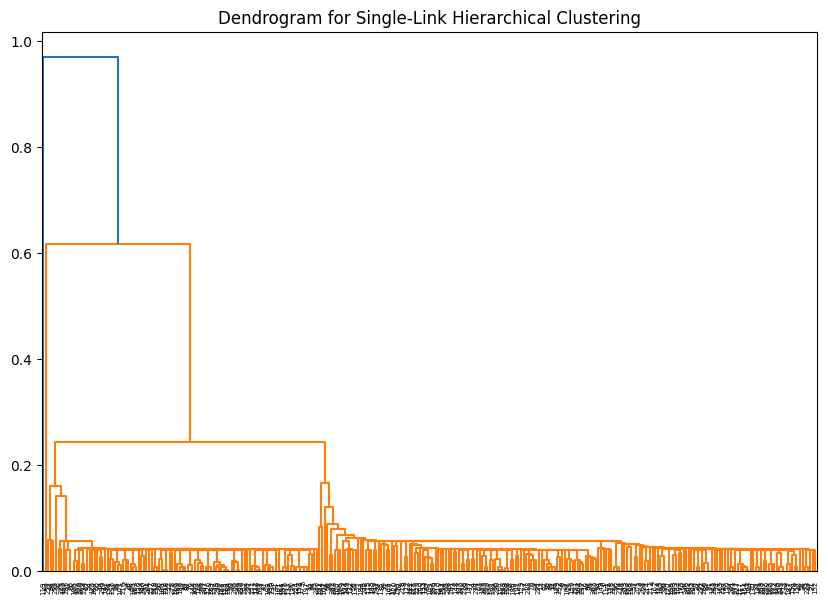

Number of records in each of the two largest clusters:
 AggCluster
0    299
1      1
Name: count, dtype: int64


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['pl', 'pw', 'sl', 'sw']])

# Step 2: Perform hierarchical clustering with Single Linkage (MIN method)
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_clustering.fit(scaled_features)

# Step 3: Check the cluster labels
data['AggCluster'] = agg_clustering.labels_

# Step 4: Visualize the dendrogram
# Generate the linkage matrix using the 'single' method
linked = linkage(scaled_features, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram for Single-Link Hierarchical Clustering')
plt.show()

# Step 5: Check how many records belong to the two largest clusters
cluster_counts = data['AggCluster'].value_counts()
print("Number of records in each of the two largest clusters:\n", cluster_counts)


Number of clusters: 1
Number of noise points: 0


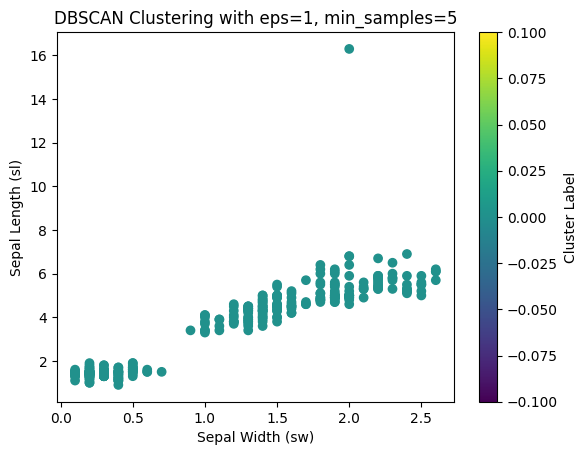

Number of clusters with eps=0.8: 1
Number of noise points with eps=0.8: 1


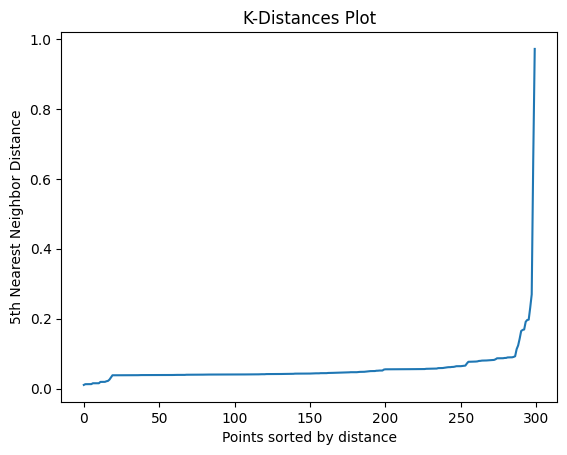

In [19]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Step 1: DBSCAN with eps=1, min_samples=5
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(scaled_features)

# Step 2: Count the number of clusters (DBSCAN labels -1 for noise points)
labels = dbscan.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise}")

# Step 3: Visualize the clustering result
plt.scatter(data['sw'], data['sl'], c=labels, cmap='viridis')
plt.title(f'DBSCAN Clustering with eps=1, min_samples=5')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 4: Experimenting with epsilon to find two clusters plus noise
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Try different eps values manually
dbscan.fit(scaled_features)
labels = dbscan.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)

print(f"Number of clusters with eps=0.8: {num_clusters}")
print(f"Number of noise points with eps=0.8: {num_noise}")

# Step 5: Estimate epsilon using k-distances plot
# Compute the distances to the 5th nearest neighbor for each point
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort the distances to plot them
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-Distances Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

# Choose epsilon based on the "elbow" or sharp change in the curve and re-run DBSCAN


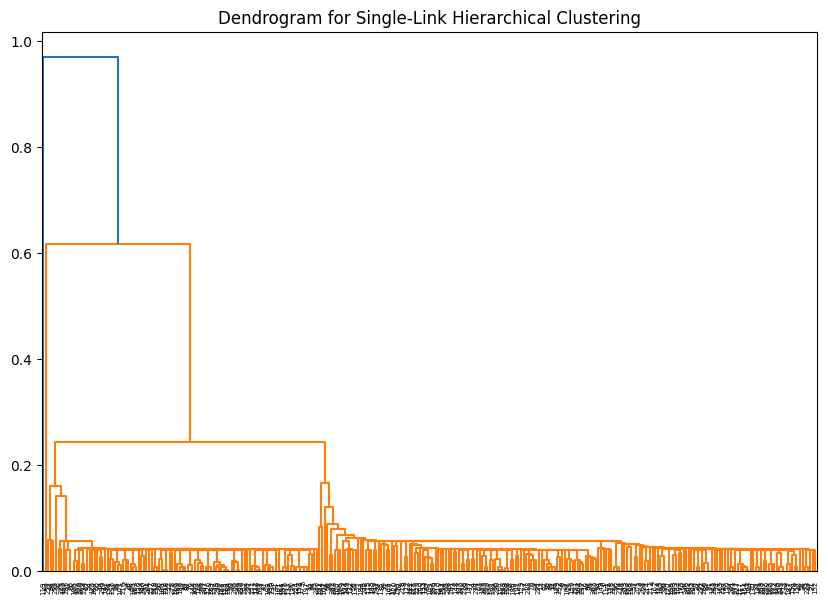

Number of records in each of the two largest clusters (Single-Link):
 AggCluster_single
0    299
1      1
Name: count, dtype: int64


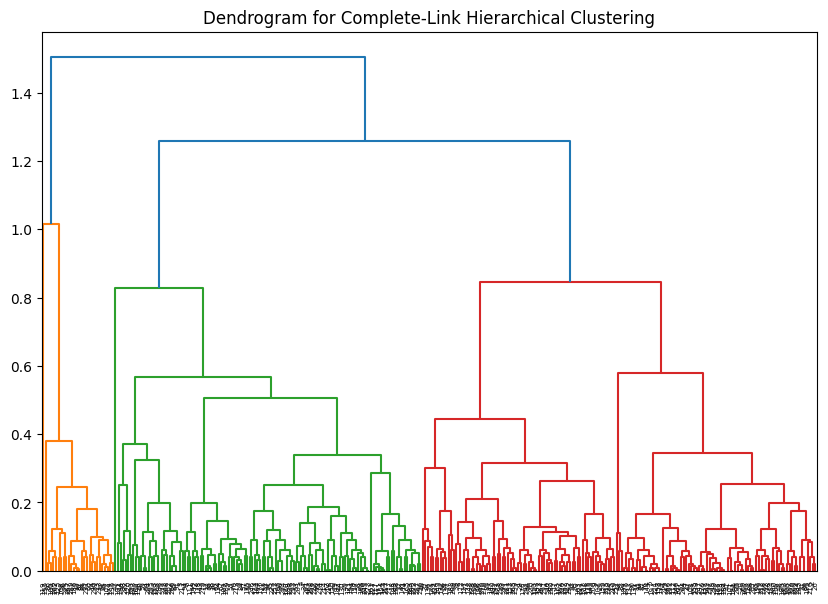

Number of records in each of the two largest clusters (Complete-Link):
 AggCluster_complete
0    272
1     28
Name: count, dtype: int64


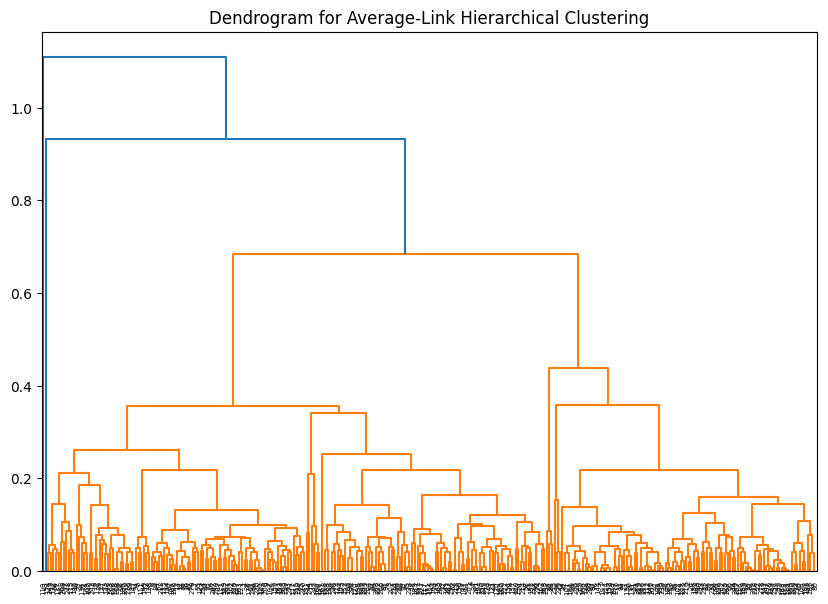

Number of records in each of the two largest clusters (Average-Link):
 AggCluster_average
0    299
1      1
Name: count, dtype: int64


In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['pl', 'pw', 'sl', 'sw']])

# Define a function to perform Agglomerative Clustering and plot the dendrogram
def hierarchical_clustering_analysis(linkage_method):
    # Step 2: Perform hierarchical clustering with the chosen linkage method
    agg_clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage_method)
    agg_clustering.fit(scaled_features)
    
    # Step 3: Check the cluster labels
    data['AggCluster_' + linkage_method] = agg_clustering.labels_
    
    # Step 4: Visualize the dendrogram
    # Generate the linkage matrix using the specified method
    linked = linkage(scaled_features, method=linkage_method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               orientation='top',
               distance_sort='ascending',
               show_leaf_counts=True)
    plt.title(f'Dendrogram for {linkage_method.capitalize()}-Link Hierarchical Clustering')
    plt.show()
    
    # Step 5: Check how many records belong to the two largest clusters
    cluster_counts = data['AggCluster_' + linkage_method].value_counts()
    print(f"Number of records in each of the two largest clusters ({linkage_method.capitalize()}-Link):\n", cluster_counts)

# Run the analysis for all three linkage methods
for method in ['single', 'complete', 'average']:
    hierarchical_clustering_analysis(method)
